In [21]:
import hmip
import numpy as np
import matplotlib.pyplot as plt

### Remark:

At anytime use the 
```python
help()
```
function to know what the function is doing and what arguments to pass.

In [22]:
help(hmip.utils.make_symmetric)

Help on function make_symmetric in module hmip.utils:

make_symmetric(matrix)
    Check if the matrix is symmetric, if no it returns a new symmetric matrix
    :param matrix: (np.array) size (n, n)
    :return: (np.array) size (n, n) symmetric



## 1. Create the solver

In [23]:
solver = hmip.HopfieldSolver()

## 2. Create the problem 

In [30]:
H = np.array([
    [1, 1], 
    [1, 10]
])
q = np.array([1, 6])

binary_indicator = np.array([1, 0])

ub = np.array([1, 1])
lb = np.array([0, 0])

A_eq = np.array([[3, 1], [0, 0]])
b_eq = np.array([0.3, 0])
A_ineq = np.array([[3, 1], [0, 0]])
b_ineq = np.array([0.3, 0])

penalty_eq = 1000
penalty_ineq = 10


def objective_function(x):
    return 1 / 2 * np.dot(np.dot(x.T, H), x) + np.dot(q.T, x)


def gradient(x):
    return np.dot(x, H) + q

### Use of hmip.utils:

In [31]:
H = hmip.utils.make_symmetric(H)
smoothness_coefficient = hmip.utils.smoothness_coefficient(H)

### Implement the problem in the solver

In [32]:
problem = solver.setup_optimization_problem(
    objective_function, 
    gradient, 
    lb, 
    ub, 
    binary_indicator, 
    A_eq=A_eq,
    b_eq=b_eq, 
    A_ineq=A_ineq, 
    b_ineq=b_ineq,
    smoothness_coef=smoothness_coefficient, 
    penalty_eq=penalty_eq,
    penalty_ineq=penalty_ineq
)

## 3. Solve the problem

In [33]:
x, x_h, f_val_hist, step_size, other_dict = solver.solve(problem)

Candidate solution found with 99 number of iterations.


## 4. Plot

In [34]:
def plot_2d(H, q, x, lb, ub, A_eq=None, b_eq=None, A_ineq=None, b_ineq=None):
    
    def objective_function_2d(x_1, x_2, H, q):
        return 1 / 2 * (H[0, 0] * x_1 ** 2 + H[1, 1] * x_2 ** 2 + 2 * H[0, 1] * x_1 * x_2) + q[0] * x_1 + q[1] * x_2

    x_1 = np.linspace(-0.1 + lb[0], ub[0] + 0.1, num=500).reshape((1, -1))    
    x_2 = np.linspace(-0.1 + lb[1], ub[1] + 0.1, num=500).reshape((1, -1))
    x_meshgrid_1, x_meshgrid_2 = np.meshgrid(x_1, x_2)
    
    objective = objective_function_2d(x_meshgrid_1, x_meshgrid_2, H, q)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(x_meshgrid_1, x_meshgrid_2, objective, 50, cmap='plasma')
    plt.colorbar()
    
    if A_eq is not None and b_eq is not None:
        t_eq = np.linspace(-0.1 + lb[0], ub[0] + 0.1, num=500)
        
    if A_ineq is not None and b_ineq is not None:
        t_ineq = np.linspace(-0.1 + lb[0], ub[0] + 0.1, num=500)
        
    plt.plot(t_eq, ((b_eq[0] - t_eq * A_eq[0, 0]) / A_eq[0, 1]), 'white')
    plt.plot(t_ineq, ((b_ineq[0] - t_ineq * A_ineq[0, 0]) / A_ineq[0, 1]), 'yellow')
    plt.plot(x[0, :], x[1, :], 'black')
    plt.plot(x[0, 0], x[1, 0], 'bo', markersize=6, color='white')
    plt.plot(x[0, - 1], x[1, - 1],
             'x', markersize=10, color='white')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim((lb[0] - 0.1, ub[0] + 0.1))
    plt.ylim((lb[1] - 0.1, ub[1] + 0.1))
    plt.show()

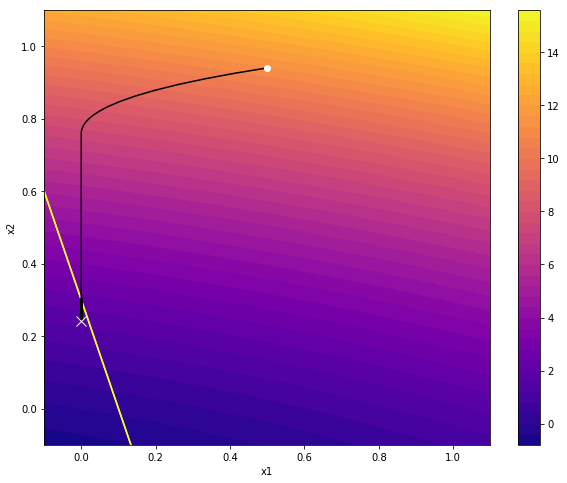

In [35]:
plot_2d(H, q, x, lb, ub,A_eq=A_eq, b_eq=b_eq, A_ineq=A_ineq, b_ineq=b_ineq)

### Another problem 

We just change te binary variable

In [40]:
binary_indicator = np.array([0, 1])

problem = solver.setup_optimization_problem(
    objective_function, 
    gradient, 
    lb, 
    ub, 
    binary_indicator, 
    A_eq=A_eq,
    b_eq=b_eq, 
    A_ineq=A_ineq, 
    b_ineq=b_ineq,
    smoothness_coef=smoothness_coefficient, 
    penalty_eq=penalty_eq,
    penalty_ineq=penalty_ineq
)

x, x_h, f_val_hist, step_size, other_dict = solver.solve(problem)

Candidate solution found with 99 number of iterations.


In [ ]:
plot_2d(H, q, x, lb, ub,A_eq=A_eq, b_eq=b_eq, A_ineq=A_ineq, b_ineq=b_ineq)